<a href="https://colab.research.google.com/github/berkaykoyuncu/python_codes/blob/master/ANN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# Load the data
data = pd.read_csv('PF_daily.csv')  # Replace 'PF_daily.csv' with the path to your data file

In [4]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Discharge'].values.reshape(-1, 1))

In [5]:
# Split the data into training and testing sets
train_ratio = 0.8  # Specify the ratio of training data
train_size = int(len(scaled_data) * train_ratio)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [6]:
# Prepare the training data
window_size = 10  # Specify the window size for input sequence
X_train, y_train = [], []
for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [22]:
# Build the ANN model
model = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', random_state=42)

In [23]:
# Train the ANN model
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(50, 50), random_state=42)

In [24]:
# Prepare the testing data
inputs = data[len(data) - len(test_data) - window_size:]['Discharge'].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i-window_size:i, 0])
X_test = np.array(X_test)

In [25]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

In [26]:
# Calculate RMSE (Root Mean Squared Error)
mse = mean_squared_error(data['Discharge'].values[-len(predictions):], predictions)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.007013173115389958


In [20]:
# Scale the predictions back to the original range
predictions = np.array(predictions).reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)

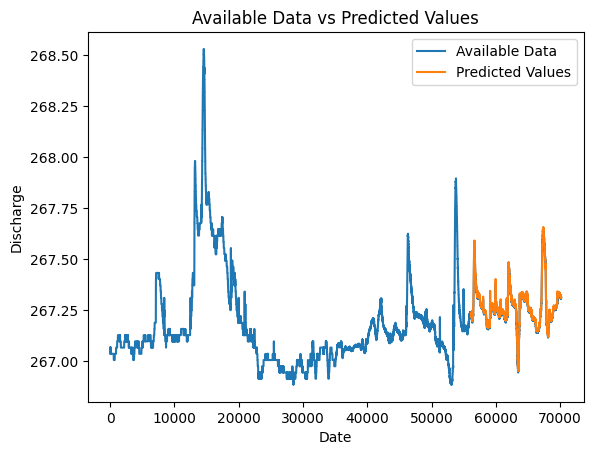

In [27]:
# Plot the available data and predicted values
plt.plot(data['Date'], data['Discharge'], label='Available Data')
plt.plot(data['Date'].values[-len(predictions):], predictions, label='Predicted Values')
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.title('Available Data vs Predicted Values')
plt.legend()
plt.show()

In [28]:
# Print the predictions
print(predictions)

[[267.23454368]
 [267.23515854]
 [267.23550145]
 ...
 [267.31564632]
 [267.31373819]
 [267.31144818]]
